In [1]:
from src.utils.PathManager import Paths as Path 
from src.utils.Visualisation import plot_ROC_simple
from src.utils.BayesianLabel import BayesianLabeler as Labeller 
from src.utils.FeatureExtractor import *
import pandas as pd 
import numpy as np 
from datetime import timedelta
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
well_code = "WKT3"

In [3]:
model = FeatureExtractor(well_code)

## Get dawn gradient label 

In [ ]:
gradient_label_df = model.get_dawn_VOLTAGE_drop_failure_label()

In [ ]:
model.evaluate_labeller(gradient_label_df)

## Get dawn data-outage label

In [ ]:
outage_label_df = model.get_data_outage_failure_label()

In [ ]:
model.evaluate_labeller(outage_label_df)

# Get charging fault label 

In [4]:
charging_fault_label = model.get_charging_fault_label()

In [5]:
len(charging_fault_label[charging_fault_label==1])

3

In [6]:
charging_fault_label[charging_fault_label==1]

2020-10-25    1
2020-10-26    1
2020-10-27    1
dtype: int64

In [7]:
model.data['label_df']

,labels
2019-02-20,4
2019-02-22,4
2019-06-11,5
2020-10-27,6
2020-10-28,6
2021-05-08,8


## Get weather label

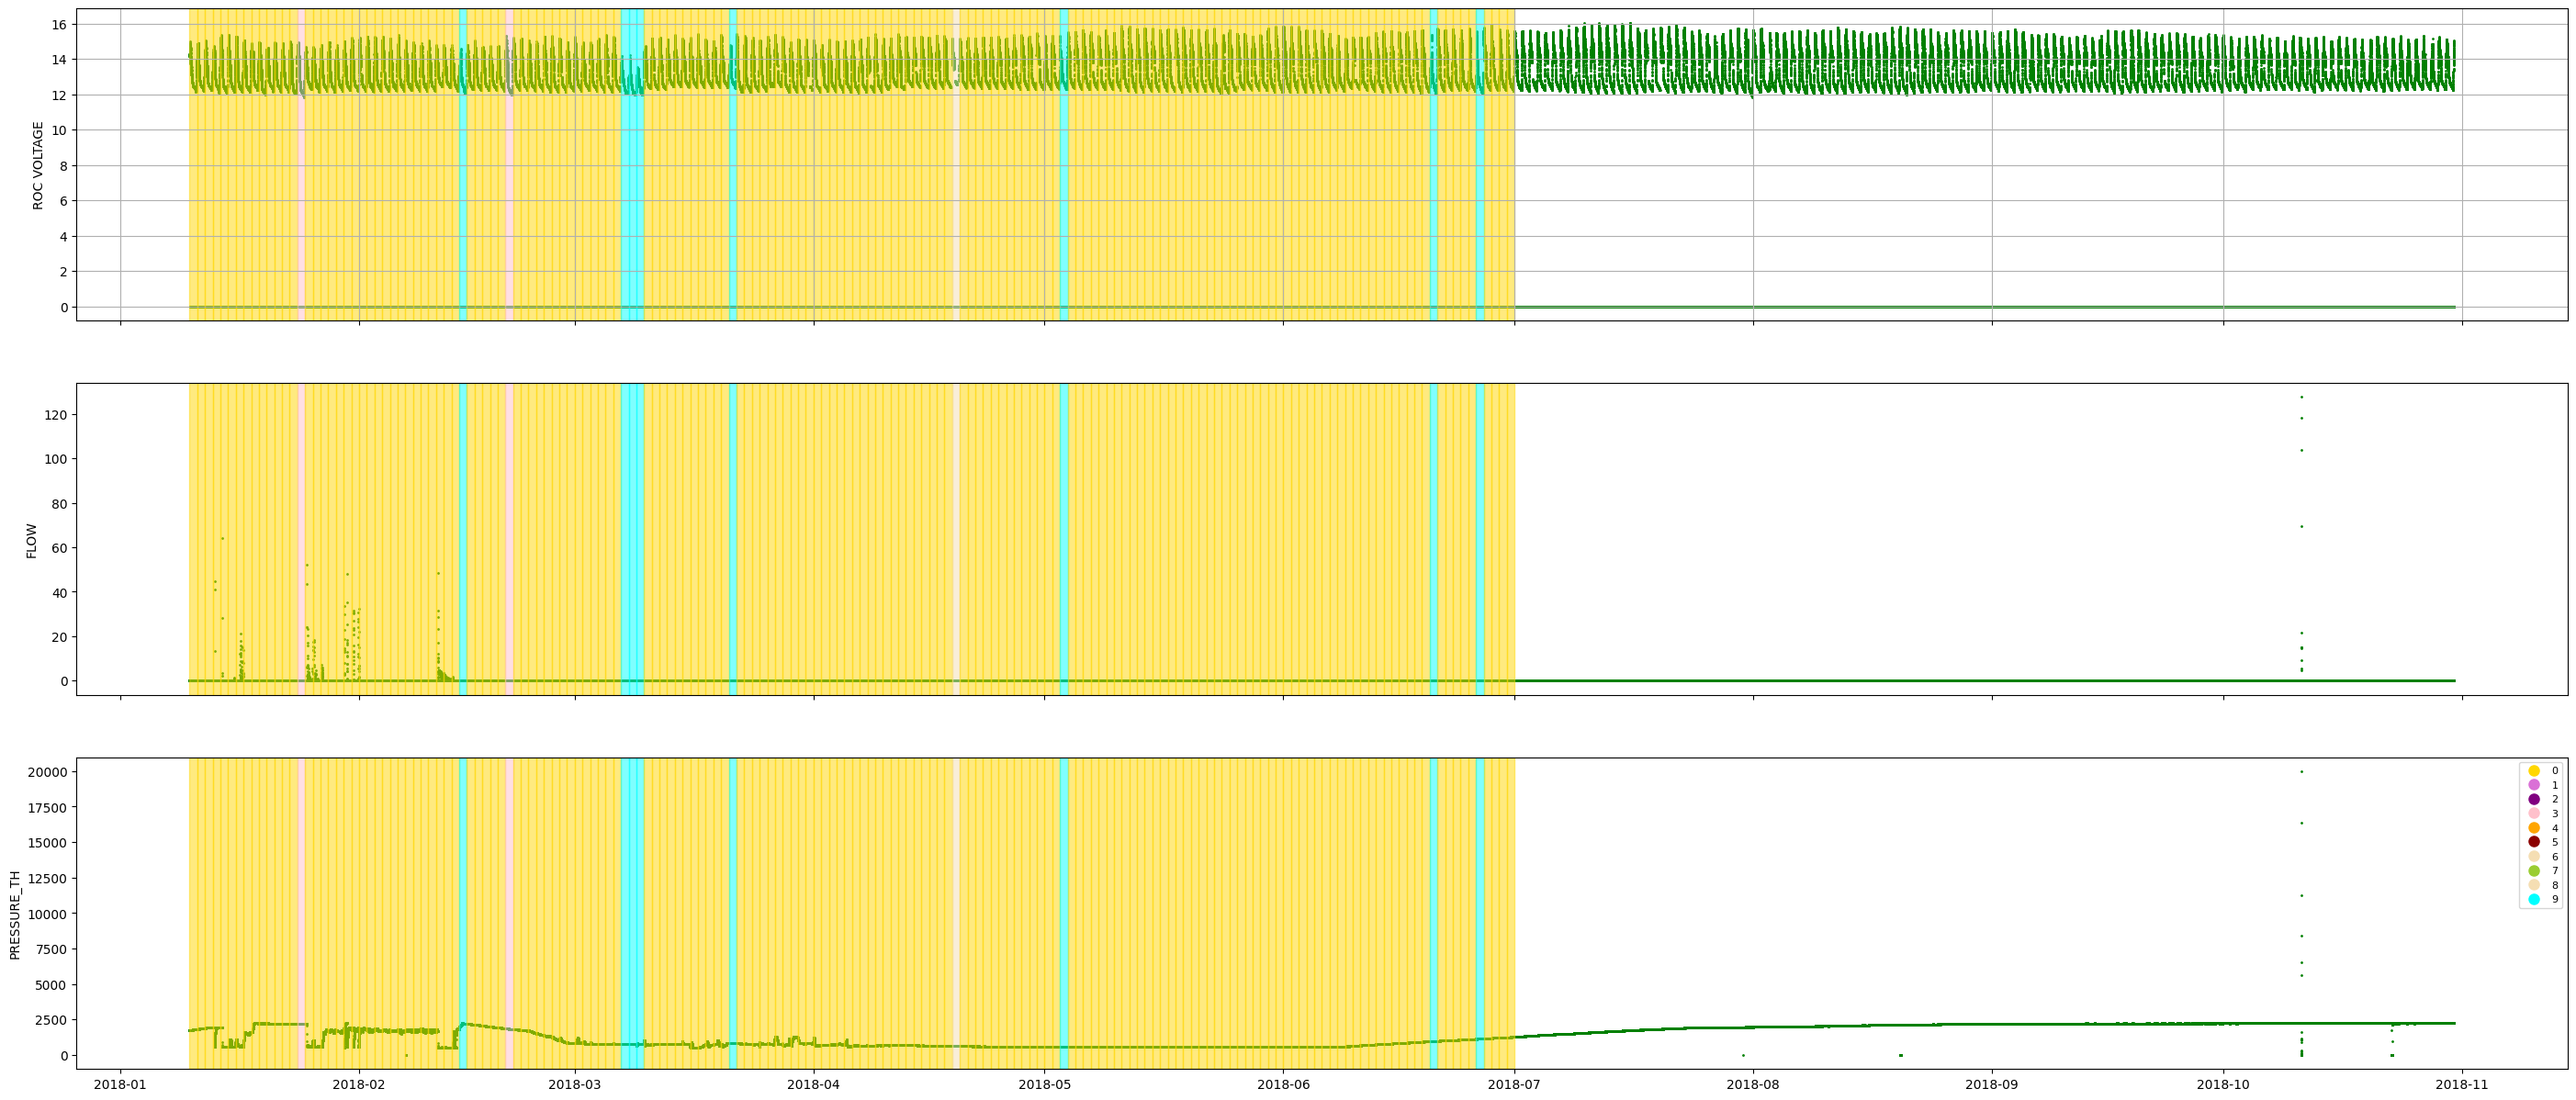

In [4]:

plot_ROC_simple(model.data['raw_df'],model.data['label_df'],"2018-01-10","2018-10-30")
plt.show()

In [5]:
gt_df = model.data['label_df']
gt_df = gt_df[gt_df.labels==9]
gt_df

,labels
2018-02-14,9
2018-03-07,9
2018-03-08,9
2018-03-09,9
2018-03-21,9
2018-05-03,9
2018-06-20,9
2018-06-26,9


(10.0, 15.0)

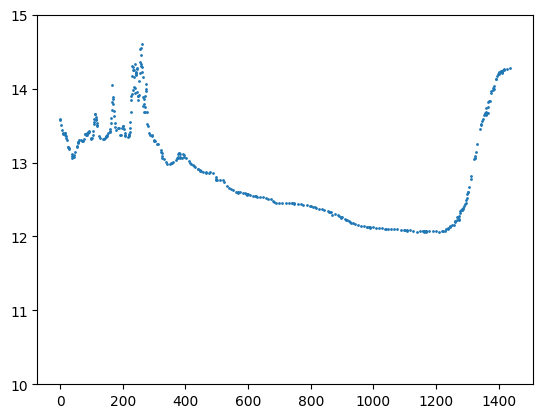

In [24]:
plt.scatter(np.arange(1440), model.data['raw_df'].loc['2018-02-14'].ROC_VOLTAGE, s=1)
plt.ylim([10,15])

In [67]:
weather_threshold = 0.98
data_anomaly_label = model.get_data_anomaly_label()
normal_date = data_anomaly_label[data_anomaly_label==0].index
V_interp_data = model.interpolated_data.ROC_VOLTAGE.loc[normal_date]
morning_V_integral = V_interp_data.apply(lambda x: np.trapz(x[:400]))



In [71]:
def get_weather_label(self)->tuple[pd.Series,pd.Series]:
    """Get weather label and percentage cloud_cover.
    
    Achieved by comparing the ratio of the integral of the day period (specified by config kwd "end") over the benchmark 
    in a specified window length (controlled by config kwd "window") against a specific weather threshold.

    Args: embedded in weather_detection_dict
        end (int|Optional) - index of end of day. Defaults to 400
        window (int|Optional) - window length of review. Defaults to 30 days.
        quantile (float|Optional) - quantile at which the day in window is considered a benchmark. Defaults to 0.85
        weather_threshold (float|Optional) - weather threshold ratio
    Returns:
        tuple[pd.Series]: weather label and fractional cloud-cover
    """
    data_anomaly_label = self.get_data_anomaly_label()
    normal_date = data_anomaly_label[data_anomaly_label==0].index
    V_interp_data = self.interpolated_data['ROC_VOLTAGE'].loc[normal_date]
    morning_V_integral = V_interp_data.apply(lambda x: np.trapz(x[:self.weather_detection_dict["end"]]))


    def get_upper_IQR(x):
        return np.quantile(x,self.weather_detection_dict["quantile"])
    rolling_median = morning_V_integral.rolling(window=self.weather_detection_dict["window"]).apply(get_upper_IQR)
    ratio = morning_V_integral/rolling_median
    return (ratio<=self.weather_detection_dict["weather_threshold"]).astype(int)

In [72]:
label[label==1]=9
label.name="labels"

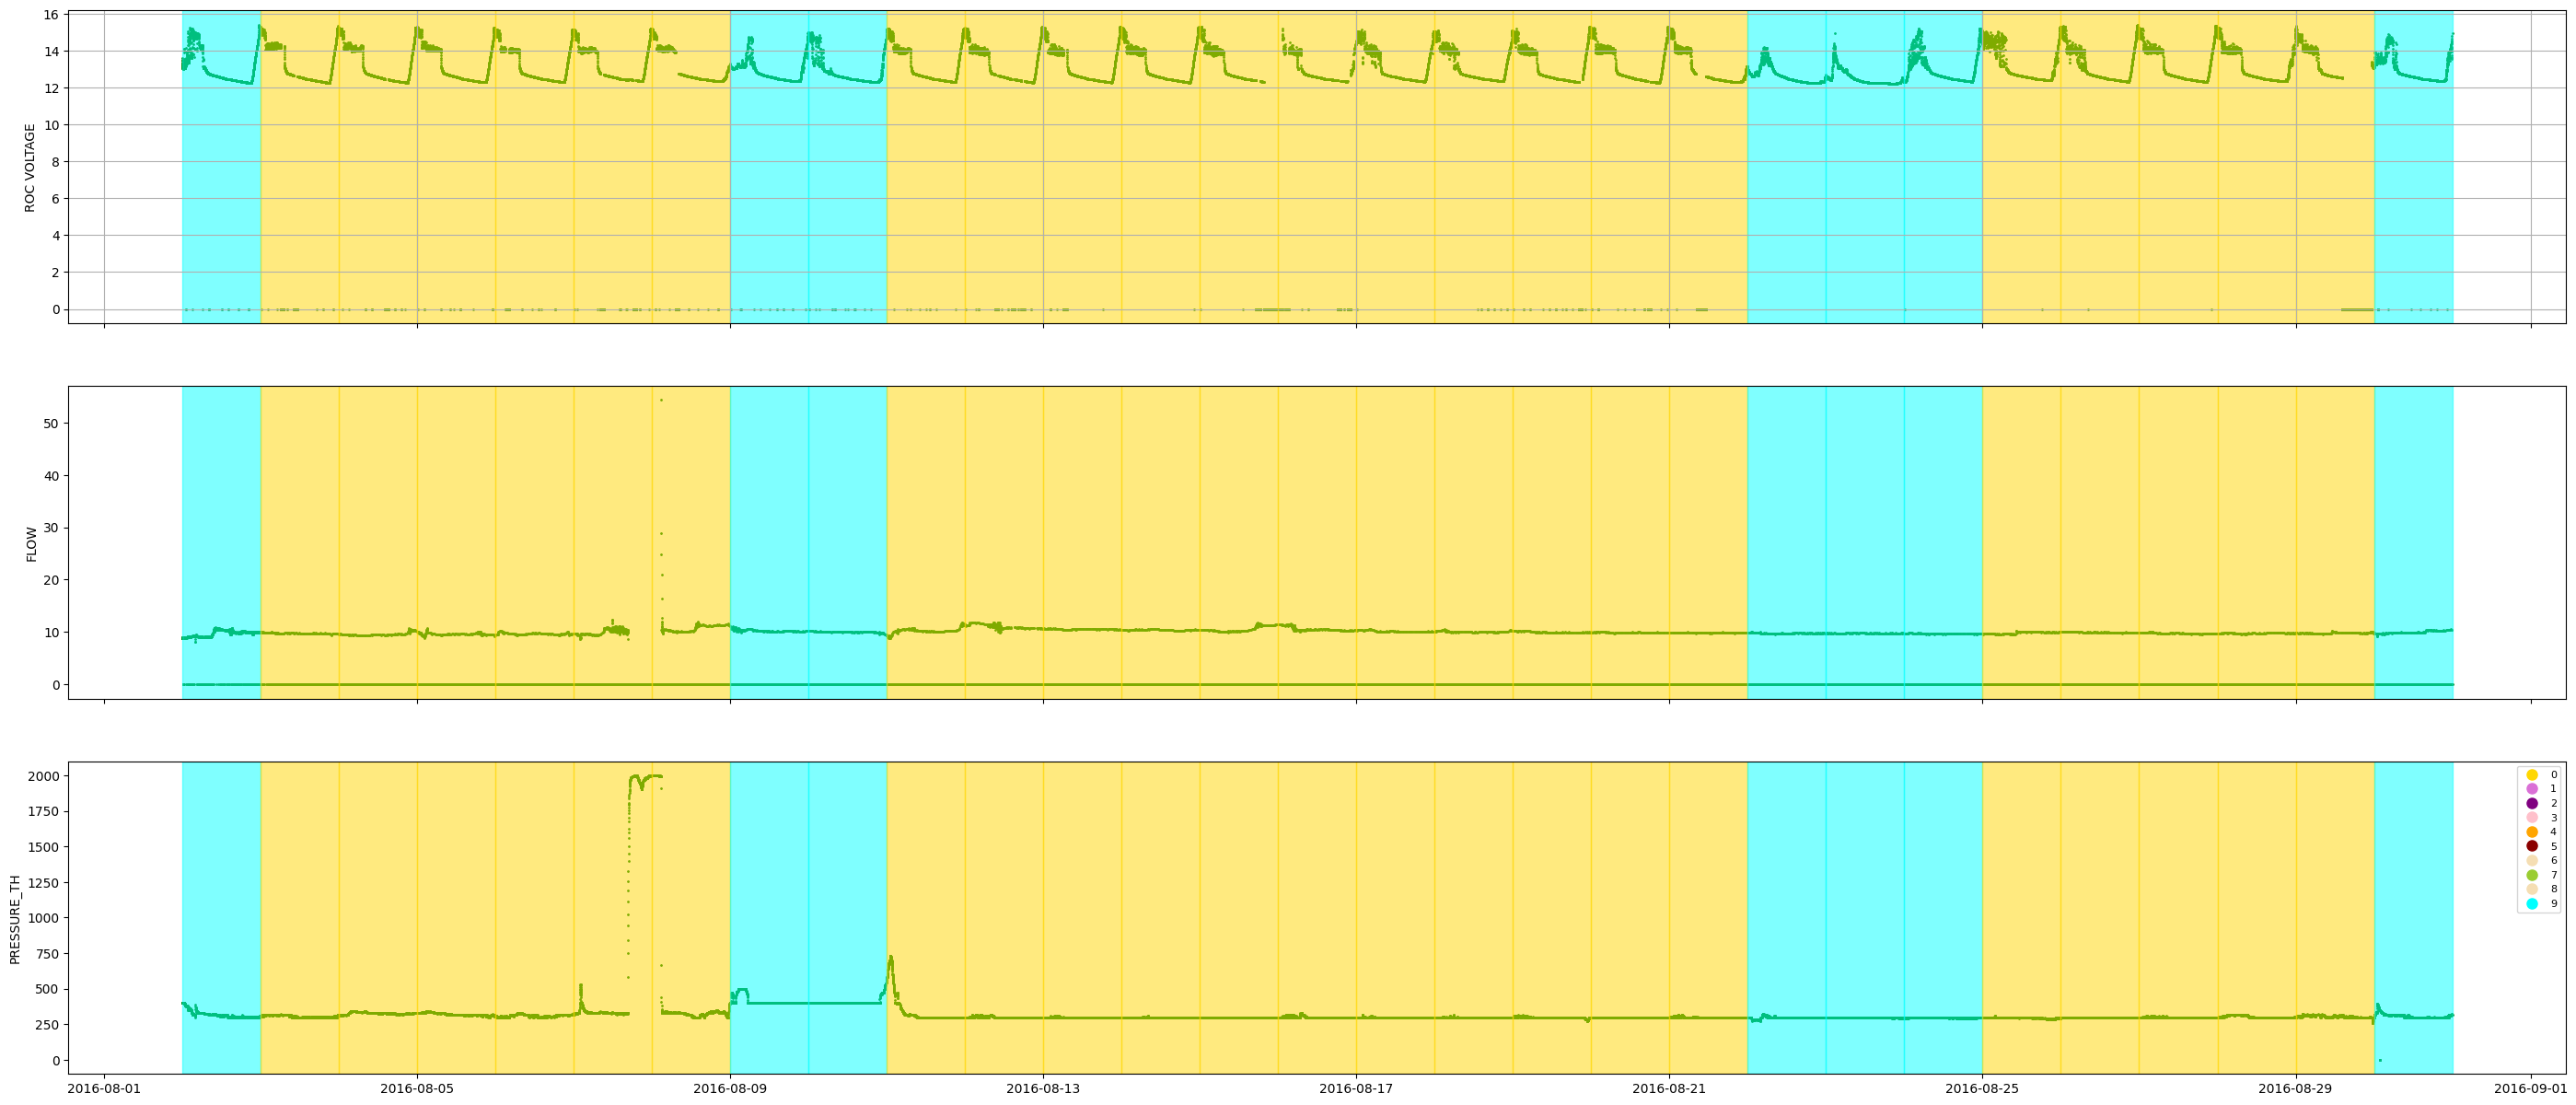

In [76]:
plot_ROC_simple(model.data['raw_df'],label.to_frame(),"2016-08-02","2016-08-30")
plt.show()

In [75]:
label[label==9]

2016-08-02    9
2016-08-09    9
2016-08-10    9
2016-08-22    9
2016-08-23    9
             ..
2020-07-21    9
2020-07-25    9
2020-08-06    9
2020-08-07    9
2020-08-09    9
Name: labels, Length: 253, dtype: int32